# Descomposición de Valores Singulares

Este código primero crea un conjunto de datos tridimensional, donde la tercera dimensión es casi una combinación lineal de las dos primeras. Luego, usamos SVD para descomponer los datos y reducimos la dimensionalidad a 2D. Finalmente, visualizamos los datos originales y los datos reducidos.

Es importante notar que SVD es una técnica que descompone los datos, y se puede usar para reducción de dimensionalidad, pero no necesariamente se utiliza para reducción de dimensionalidad en todos los contextos. En aprendizaje automático, es común usar técnicas como PCA (Principal Component Analysis) que utiliza SVD internamente para reducir la dimensionalidad.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Crear un conjunto de datos artificial

In [2]:
np.random.seed(42)
X = np.random.rand(100, 3)

In [3]:
X[0:5,:]

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497]])

Supongamos que una dimensión es en gran medida una combinación lineal de las otras

In [4]:
X[:, 2] = 0.5 * X[:, 0] + 0.5 * X[:, 1] + np.random.rand(100) * 0.1

In [5]:
X[0:5,:]

array([[0.37454012, 0.95071431, 0.66779538],
       [0.59865848, 0.15601864, 0.43047403],
       [0.05808361, 0.86617615, 0.51619339],
       [0.70807258, 0.02058449, 0.42807153],
       [0.83244264, 0.21233911, 0.59500001]])

### 2. Aplicar SVD

In [7]:
U, s, Vt = np.linalg.svd(X, full_matrices=False)
print("Forma de la matriz original X:", X.shape)
print("Forma de la matriz U:", U.shape)
print("Forma del vector s:", s.shape)
print("Forma de la matriz Vt:", Vt.shape)

Forma de la matriz original X: (100, 3)
Forma de la matriz U: (100, 3)
Forma del vector s: (3,)
Forma de la matriz Vt: (3, 3)


In [8]:
U[0:5,:]

array([[-0.12097403, -0.12679293,  0.14328239],
       [-0.0699852 ,  0.11737662, -0.05414183],
       [-0.08865647, -0.18765283, -0.05162881],
       [-0.06765741,  0.17726755, -0.08503203],
       [-0.09680822,  0.16428199, -0.07209937]])

In [9]:
s

array([9.6230903 , 2.87976389, 0.27341321])

In [10]:
Vt

array([[-0.53453866, -0.58644399, -0.60856541],
       [ 0.72507665, -0.68816677,  0.02627453],
       [ 0.43420303,  0.42721182, -0.79306859]])

In [11]:
print(-0.12097403*9.6230903)
print(-0.12679293*2.87976389)

-1.164144014644909
-0.3651337013212977


Reducir la dimensionalidad a 2D

In [12]:
X_reduced = U[:, :2] * s[:2]

In [13]:
X_reduced.shape

(100, 2)

In [14]:
X_reduced

array([[-1.16414404, -0.36513369],
       [-0.6734739 ,  0.33801694],
       [-0.85314918, -0.54039583],
       [-0.65107335,  0.5104887 ],
       [-0.9315942 ,  0.47309334],
       [-0.48422729, -0.06741673],
       [-0.65315054,  0.12363611],
       [-0.39688548, -0.0933814 ],
       [-1.13033072, -0.19125042],
       [-0.97551222, -0.0195707 ],
       [-0.68822628,  0.33454262],
       [-1.66083428,  0.04885653],
       [-0.34405846,  0.15900517],
       [-0.53649548,  0.2450766 ],
       [-0.88967665, -0.58623552],
       [-0.87574181,  0.28049763],
       [-0.64813453,  0.27988143],
       [-1.49758086, -0.06152035],
       [-1.33218949, -0.1805032 ],
       [-0.21990868,  0.11480502],
       [-0.60115268,  0.10520145],
       [-0.59297602,  0.07559875],
       [-0.87292585, -0.43573977],
       [-1.53271669,  0.20798117],
       [-0.78909513, -0.54387516],
       [-1.34340373,  0.01947178],
       [-0.43763245,  0.18786589],
       [-0.8548027 ,  0.23836868],
       [-0.57604349,

### 3. Visualizar los datos

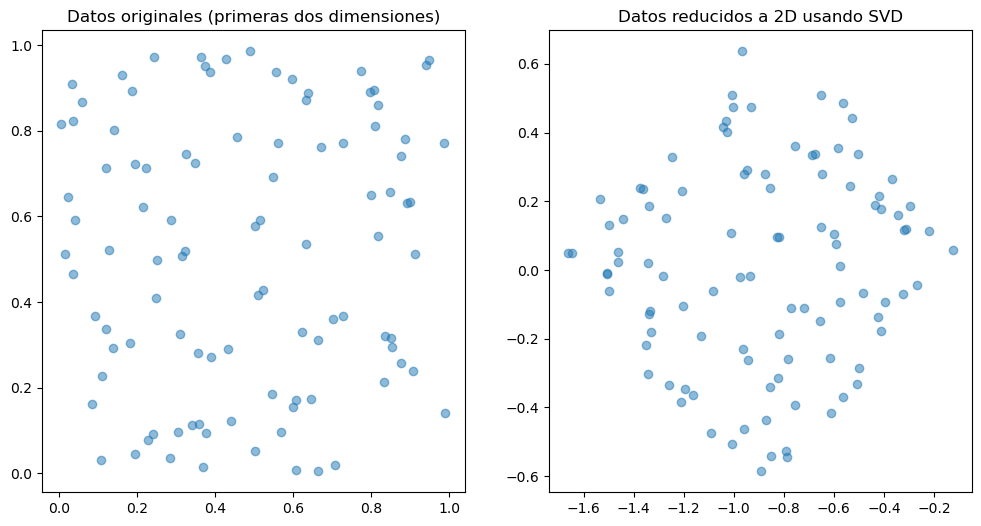

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_title("Datos originales (primeras dos dimensiones)")

ax[1].scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
ax[1].set_title("Datos reducidos a 2D usando SVD")

plt.show()

### Varianza Explicada
La proporción de la varianza explicada por cada componente se puede determinar a partir de los valores singulares s que se obtienen del SVD. La proporción de varianza explicada por un componente particular se calcula como el cuadrado de un valor singular dividido por la suma de los cuadrados de todos los valores singulares.

In [16]:
s

array([9.6230903 , 2.87976389, 0.27341321])

Calculamos la proporción de varianza explicada para cada componente

In [17]:
explained_variance_ratio = s**2 / np.sum(s**2)

In [18]:
np.round(explained_variance_ratio*100,2)

array([9.171e+01, 8.210e+00, 7.000e-02])

In [23]:
# Varianza explicada de los 2 primeros componentes
np.sum(explained_variance_ratio[0:2])*100

99.92596458963433

Calculamos la varianza explicada acumulada

In [24]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("Varianza explicada por cada componente:", explained_variance_ratio)
print("Varianza explicada acumulada:", cumulative_explained_variance_ratio)

Varianza explicada por cada componente: [9.17127294e-01 8.21323518e-02 7.40354104e-04]
Varianza explicada acumulada: [0.91712729 0.99925965 1.        ]


Visualizamos la varianza explicada

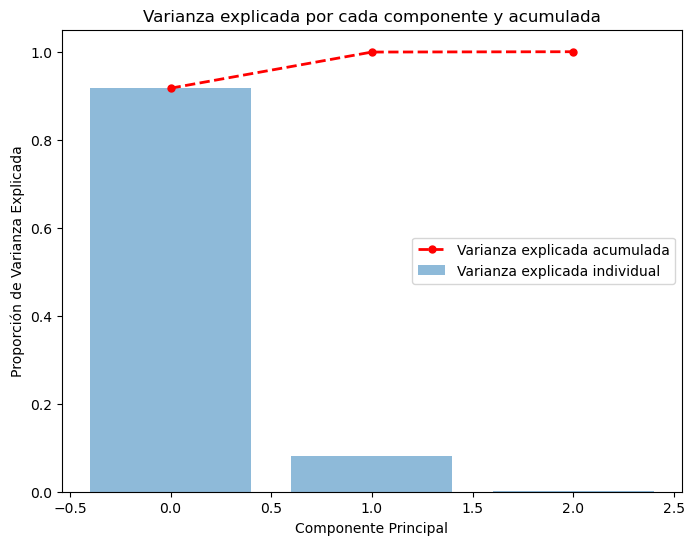

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, 
        align='center', label='Varianza explicada individual')
plt.plot(range(len(cumulative_explained_variance_ratio)), 
         cumulative_explained_variance_ratio, color='red', marker='o', 
         linestyle='dashed', linewidth=2, markersize=5, label='Varianza explicada acumulada')
plt.title("Varianza explicada por cada componente y acumulada")
plt.xlabel("Componente Principal")
plt.ylabel("Proporción de Varianza Explicada")
plt.legend()
plt.show()

Se muestra un gráfico que permite ver la proporción de varianza que se explica por cada componente, así como la varianza explicada acumulada. Esto te ayuda a decidir cuántos componentes principales deberías considerar para retener una cierta proporción de la varianza de tus datos originales.